In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.metrics import mean_squared_error

In [5]:
import math

In [6]:
data=pd.read_excel('Auto mobile price data.xlsm')

In [7]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [8]:
data.shape

(205, 26)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [10]:
data.replace('?',np.nan,inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-

In [12]:
data[data['price'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,NaN,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,NaN,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,1,NaN,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


In [13]:
data=data[~data['price'].isna()]

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
symboling            201 non-null int64
normalized-losses    164 non-null float64
make                 201 non-null object
fuel-type            201 non-null object
aspiration           201 non-null object
num-of-doors         199 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 197 non-null float64
stroke               197 non-null float64
compression-ratio    201 non-null float64
horsepower           199 non-

In [15]:
data.isna().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

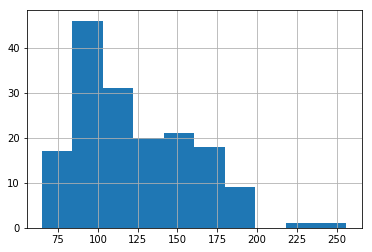

In [16]:
data['normalized-losses'].hist()
plt.show()

In [17]:
data['normalized-losses'].describe()

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: normalized-losses, dtype: float64

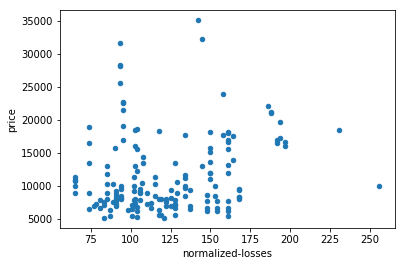

In [18]:
data.plot('normalized-losses','price',kind='scatter')
plt.show()

In [19]:
data['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

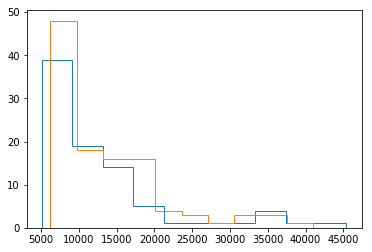

In [20]:
plt.hist(data.loc[data['num-of-doors']=='two','price'],histtype='step')

plt.hist(data.loc[data['num-of-doors']=='four','price'],histtype='step')
plt.show()

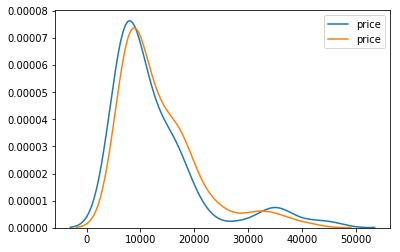

In [21]:
sns.kdeplot(data.loc[data['num-of-doors']=='two','price'])
sns.kdeplot(data.loc[data['num-of-doors']=='four','price'])
plt.show()

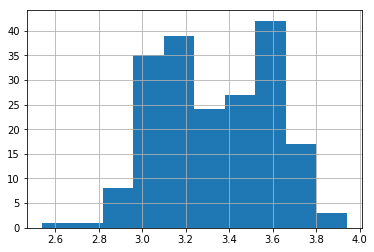

In [22]:
data['bore'].hist()
plt.show()

In [23]:
data['bore']=data['bore'].fillna(np.mean(data.bore))

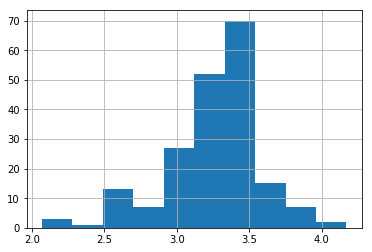

In [24]:
data['stroke'].hist()
plt.show()

In [25]:
data['stroke']=data['stroke'].fillna(np.mean(data.stroke))

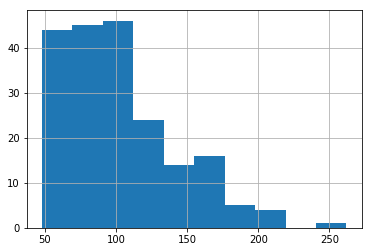

In [26]:
data['horsepower'].hist()
plt.show()

In [27]:
data['horsepower']=data['horsepower'].fillna(np.mean(data.horsepower))

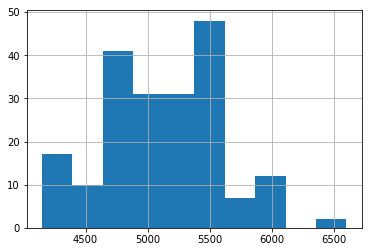

In [28]:
data['peak-rpm'].hist()
plt.show()

In [29]:
data['peak-rpm']=data['peak-rpm'].fillna(np.mean(data['peak-rpm']))

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
symboling            201 non-null int64
normalized-losses    164 non-null float64
make                 201 non-null object
fuel-type            201 non-null object
aspiration           201 non-null object
num-of-doors         199 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    201 non-null float64
horsepower           201 non-

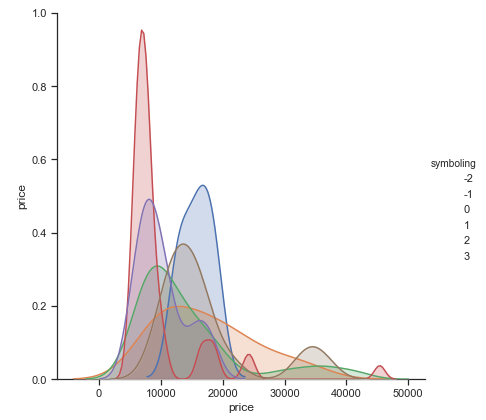

In [31]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data,vars=['price'],hue='symboling',height=6)
plt.show()

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
symboling            201 non-null int64
normalized-losses    164 non-null float64
make                 201 non-null object
fuel-type            201 non-null object
aspiration           201 non-null object
num-of-doors         199 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    201 non-null float64
horsepower           201 non-

In [33]:
data.drop(['normalized-losses','num-of-doors'],axis=1,inplace=True)


In [34]:
data.drop(['make'],axis=1,inplace=True)

In [35]:
def unique_vals(data):
    obj_cols=data.select_dtypes(include=['object']).columns
    for col in obj_cols:
        print('unique values in {0} are {1}'.format(col,data[col].unique()))

In [36]:
unique_vals(data)

unique values in fuel-type are ['gas' 'diesel']
unique values in aspiration are ['std' 'turbo']
unique values in body-style are ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
unique values in drive-wheels are ['rwd' 'fwd' '4wd']
unique values in engine-location are ['front' 'rear']
unique values in engine-type are ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf']
unique values in num-of-cylinders are ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
unique values in fuel-system are ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [37]:
data['num-of-cylinders']=data['num-of-cylinders'].map({'four':4,'six':6,'five':5,'three':3,'twelve':12,'two':2,'eight':8}).astype(int)

In [38]:
unique_vals(data)

unique values in fuel-type are ['gas' 'diesel']
unique values in aspiration are ['std' 'turbo']
unique values in body-style are ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
unique values in drive-wheels are ['rwd' 'fwd' '4wd']
unique values in engine-location are ['front' 'rear']
unique values in engine-type are ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf']
unique values in fuel-system are ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [39]:
final_data=pd.get_dummies(data,drop_first=True)

In [40]:
final_data.head()

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,...,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,...,0,1,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


In [41]:
lr=LinearRegression()

In [42]:
X=final_data.loc[:,final_data.columns.drop('price')]

In [43]:
y=final_data.loc[:,'price']

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [45]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
predicted=lr.predict(X_test)

In [47]:
lr.score(X_test,y_test)

0.9008630092792671

In [48]:
math.sqrt(mean_squared_error(y_test,predicted))

3482.684439884002